In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt
import glob

In [4]:
train_loc = r'/content/drive/MyDrive/Machine Learning/Datasets/Chest Scan/chest_xray/train'
test_loc = r'/content/drive/MyDrive/Machine Learning/Datasets/Chest Scan/chest_xray/test'

Sample of Normal Images


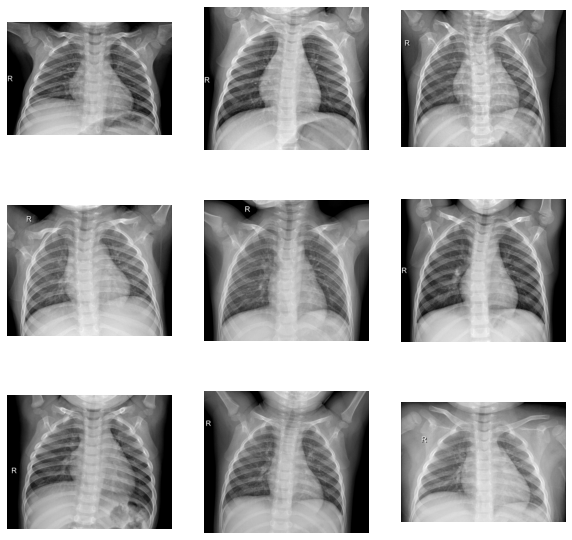

In [27]:
Normal_images = [name for name in os.listdir(r'/content/drive/MyDrive/Machine Learning/Datasets/Chest Scan/chest_xray/train/NORMAL')]

np.random.seed(42)
random_images = [np.random.choice(Normal_images, replace = False) for i in range(9)]

img_dir = '../content/drive/MyDrive/Machine Learning/Datasets/Chest Scan/chest_xray/train/NORMAL'

print('Sample of Normal Images')

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    img = plt.imread(os.path.join(img_dir,random_images[i]))
    plt.axis('off')
    plt.imshow(img,cmap='gray')  

Sample of Pneumonia Images


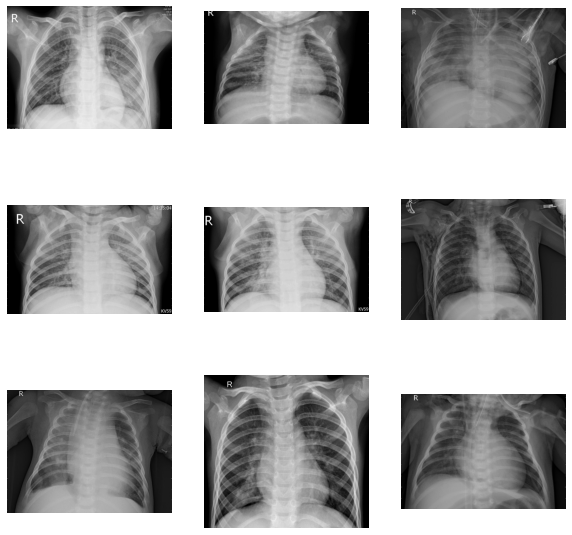

In [28]:
Pneumonia_images = [name for name in os.listdir(r'/content/drive/MyDrive/Machine Learning/Datasets/Chest Scan/chest_xray/train/PNEUMONIA')]

np.random.seed(42)
random_images = [np.random.choice(Pneumonia_images, replace = False) for i in range(9)]

img_dir = '../content/drive/MyDrive/Machine Learning/Datasets/Chest Scan/chest_xray/train/PNEUMONIA'

print('Sample of Pneumonia Images')

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    img = plt.imread(os.path.join(img_dir,random_images[i]))
    plt.axis('off')
    plt.imshow(img,cmap='gray')  

In [5]:
print('Train set:')
print('-'*20)
train_Normal = len(os.listdir(os.path.join(train_loc, 'NORMAL')))
train_Pneumonia = len(os.listdir(os.path.join(train_loc, 'PNEUMONIA')))
print(f'Normal = {train_Normal}')
print(f'Pneumonia = {train_Pneumonia}')

print('\nTest set:')
print('-'*20)
test_Normal = len(os.listdir(os.path.join(test_loc, 'NORMAL')))
test_Pneumonia = len(os.listdir(os.path.join(test_loc, 'PNEUMONIA')))
print(f'Normal = {test_Normal}')
print(f'Pneumonia = {test_Pneumonia}')

Train set:
--------------------
Normal = 1349
Pneumonia = 3883

Test set:
--------------------
Normal = 234
Pneumonia = 390


In [11]:
# Preprocessing
trdata = ImageDataGenerator(rescale=1./255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True)
train_data = trdata.flow_from_directory(directory=train_loc, target_size=(224, 224))

tesldata = ImageDataGenerator(rescale=1./255)
test_data = tesldata.flow_from_directory(directory=test_loc, target_size=(224, 224))


Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [12]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(32, activation='relu'),

    Dense(2, activation='softmax')
])

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
batch_size = 100
hist = model.fit(train_data,
                 steps_per_epoch=train_data.samples//batch_size,
                 validation_data=test_data,
                 validation_steps=test_data.samples//batch_size,
                 epochs=50
                 )

Epoch 1/50
52/52 [==============================] - 219s 3s/step - loss: 0.8891 - accuracy: 0.6990 - val_loss: 0.6086 - val_accuracy: 0.6823
Epoch 2/50
52/52 [==============================] - 122s 2s/step - loss: 0.3548 - accuracy: 0.8419 - val_loss: 0.7076 - val_accuracy: 0.7188
Epoch 3/50
52/52 [==============================] - 95s 2s/step - loss: 0.2575 - accuracy: 0.8924 - val_loss: 0.5432 - val_accuracy: 0.7448
Epoch 4/50
52/52 [==============================] - 78s 2s/step - loss: 0.2464 - accuracy: 0.8962 - val_loss: 0.2767 - val_accuracy: 0.8646
Epoch 5/50
52/52 [==============================] - 70s 1s/step - loss: 0.2258 - accuracy: 0.9123 - val_loss: 0.4017 - val_accuracy: 0.8385
Epoch 6/50
52/52 [==============================] - 61s 1s/step - loss: 0.2083 - accuracy: 0.9171 - val_loss: 0.4179 - val_accuracy: 0.8385
Epoch 7/50
52/52 [==============================] - 59s 1s/step - loss: 0.2070 - accuracy: 0.9201 - val_loss: 0.4502 - val_accuracy: 0.8177
Epoch 8/50
52/52 [

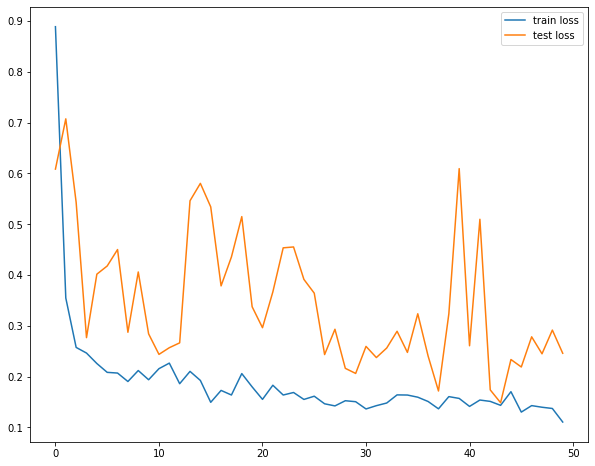

In [17]:
plt.figure(figsize=(10, 8))
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='test loss')
plt.legend()
plt.show()

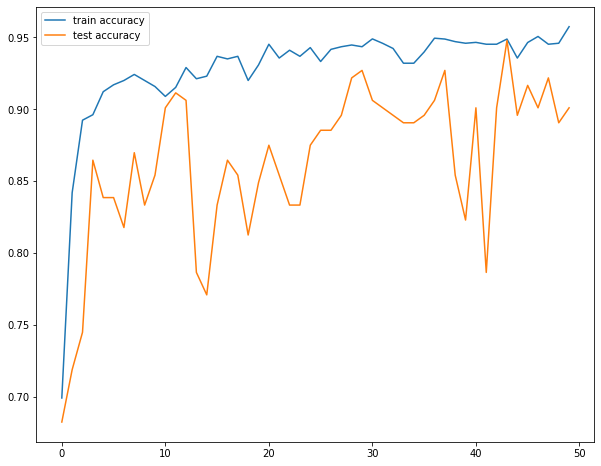

In [18]:
plt.figure(figsize=(10, 8))
plt.plot(hist.history['accuracy'],label='train accuracy')
plt.plot(hist.history['val_accuracy'],label='test accuracy')
plt.legend()
plt.show()